### Importing the Libraries

In [90]:
import os, cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense, Activation, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam

### Reading the Training Dataset

In [91]:
directory = "./Training Dataset"
categories = ["Grape", "Raisin"]

dataset = []
for category in categories:
    folder = os.path.join(directory, category)
    label = categories.index(category)

    for name in os.listdir(folder):
        image_name = os.path.join(folder, name)
        image = cv2.imread(image_name)
        dataset.append([image, label])

random.shuffle(dataset)

x_train = []
y_train = []

for image, label in dataset:
    x_train.append(image)
    y_train.append(label)

x_train = np.array(x_train)
y_train = np.array(y_train)

### Reading the Validation Dataset

In [92]:
directory = "./Validation Dataset"
categories = ["Grape", "Raisin"]

dataset = []
for category in categories:
    folder = os.path.join(directory, category)
    label = categories.index(category)

    for name in os.listdir(folder):
        image_name = os.path.join(folder, name)
        image = cv2.imread(image_name)
        dataset.append([image, label])

random.shuffle(dataset)

x_val = []
y_val = []

for image, label in dataset:
    x_val.append(image)
    y_val.append(label)

x_val = np.array(x_val)
y_val = np.array(y_val)

### Reading the Test Dataset

In [93]:
directory = "./Test Dataset"
categories = ["Grape", "Raisin"]

dataset = []
for category in categories:
    folder = os.path.join(directory, category)
    label = categories.index(category)

    for name in os.listdir(folder):
        image_name = os.path.join(folder, name)
        image = cv2.imread(image_name)
        dataset.append([image, label])

random.shuffle(dataset)

x_test = []
y_test = []

for image, label in dataset:
    x_test.append(image)
    y_test.append(label)

x_test = np.array(x_test)
y_test = np.array(y_test)

### Function for Generating Label

In [94]:
def get_label(label):
    if not label:
        return "Grape"
    return "Raisin"

### Displaying some samples

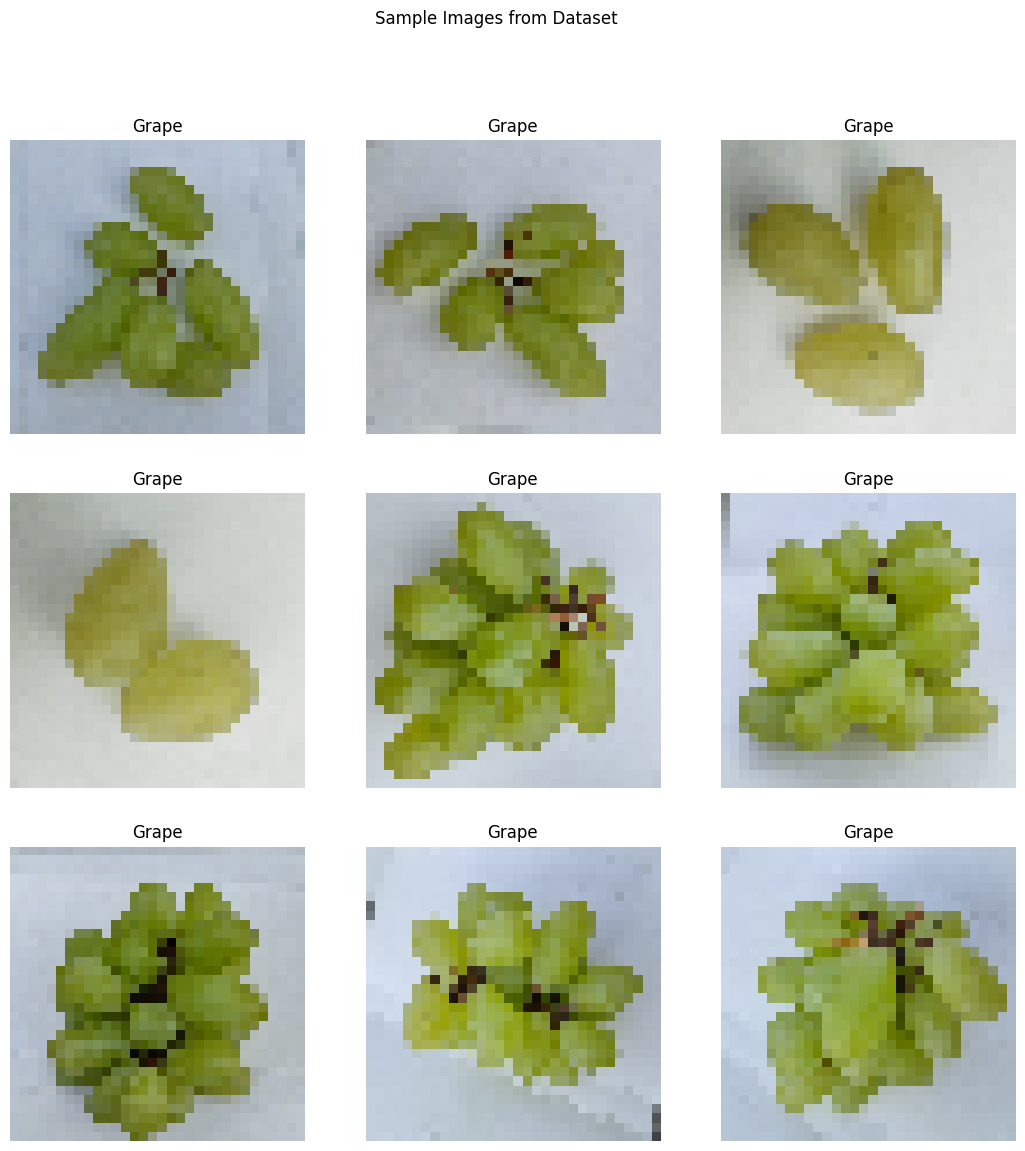

In [95]:
plt.figure(figsize = (13, 13))
for k in range(1, 10):
    plt.subplot(3, 3, k)
    plt.imshow(cv2.cvtColor(x_train[k], cv2.COLOR_BGR2RGB))
    plt.title(get_label(y_train[k]))
    plt.axis("off")

plt.suptitle("Sample Images from Dataset")
plt.show()

### Showing Training, Validation & Test Set Shape

In [96]:
print("Training set:", x_train.shape, y_train.shape)
print("Validation set:", x_val.shape, y_val.shape)
print("Test set:", x_test.shape, y_test.shape)

Training set: (1002, 32, 32, 3) (1002,)
Validation set: (140, 32, 32, 3) (140,)
Test set: (260, 32, 32, 3) (260,)


### Building the Model

In [97]:
inputs = Input(shape = (32, 32, 3))
x = Conv2D(64, (3, 3), activation = "relu")(inputs)
x = Conv2D(64, (3, 3), activation = "relu")(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation = "relu")(x)
x = Conv2D(64, (3, 3), activation = "relu")(x)
x = Conv2D(64, (3, 3), activation = "relu")(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation = "relu")(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(512, activation = "relu")(x)
x = Dense(256, activation = "relu")(x)
x = Dense(128, activation = "relu")(x)
outputs = Dense(1, activation = "sigmoid")(x)

model = Model(inputs = inputs, outputs = outputs)

model.compile(optimizer = Adam(0.0001), loss = "binary_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_47 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 conv2d_48 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_49 (Conv2D)          (None, 12, 12, 64)        36928     
                                                                 
 conv2d_50 (Conv2D)          (None, 10, 10, 64)        36928     
                                                           

In [98]:
history = model.fit(x_train, y_train, epochs = 20, validation_data = (x_val, y_val))

Epoch 1/20
32/32 [==============================] - 6s 95ms/step - loss: 0.4416 - accuracy: 0.8024 - val_loss: 1.0187 - val_accuracy: 0.6071
Epoch 2/20
32/32 [==============================] - 2s 79ms/step - loss: 0.0797 - accuracy: 0.9750 - val_loss: 0.3852 - val_accuracy: 0.8500
Epoch 3/20
32/32 [==============================] - 3s 95ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.8470 - val_accuracy: 0.7857
Epoch 4/20
32/32 [==============================] - 2s 78ms/step - loss: 0.0417 - accuracy: 0.9800 - val_loss: 0.7214 - val_accuracy: 0.7929
Epoch 5/20
32/32 [==============================] - 2s 76ms/step - loss: 0.0239 - accuracy: 0.9880 - val_loss: 0.2734 - val_accuracy: 0.9214
Epoch 6/20
32/32 [==============================] - 2s 78ms/step - loss: 0.0847 - accuracy: 0.9681 - val_loss: 0.2093 - val_accuracy: 0.9429
Epoch 7/20
32/32 [==============================] - 3s 79ms/step - loss: 0.0067 - accuracy: 0.9980 - val_loss: 0.2474 - val_accuracy: 0.9429
Epoch 8/20
32

### Plotting The Accuracy & Loss Graph

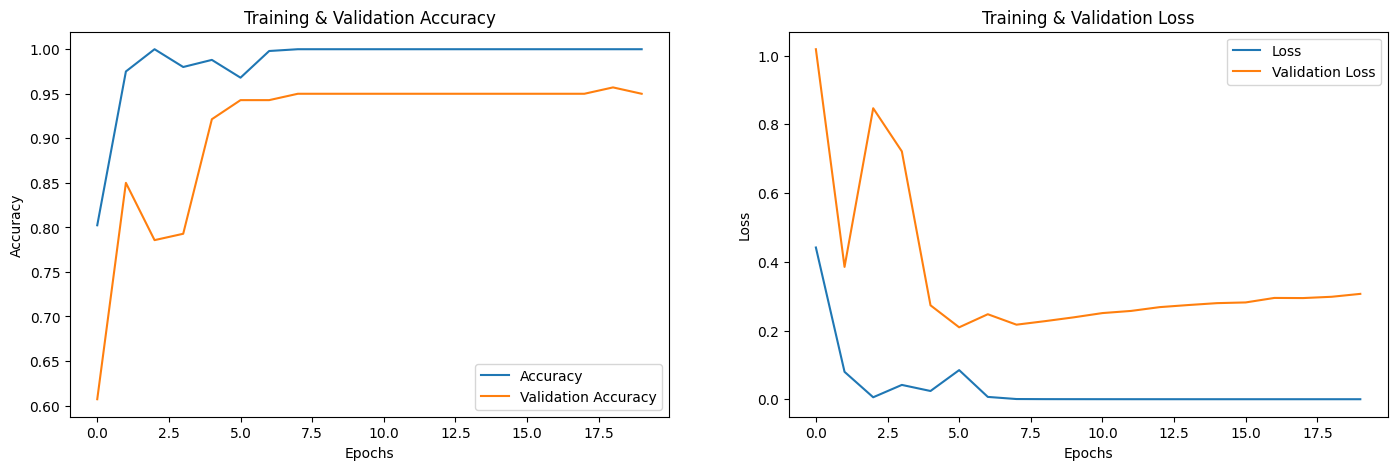

In [99]:
plt.figure(figsize = (17, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label = "Accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy")
plt.title("Training & Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label = "Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.title("Training & Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Evaluating the Model on Test Set

In [100]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"Test Accuracy: {round(test_accuracy * 100, 2)}%")
print(f"Test Loss: {round(test_loss * 100, 2)}%")

9/9 [==============================] - 0s 15ms/step - loss: 0.1150 - accuracy: 0.9808
Test Accuracy: 98.08%
Test Loss: 11.5%
